In [2]:
import module.TorchDataset_aug as td
import platform
import importlib

importlib.reload(td) # 클래스 수정 시 import 리로드

# os에 따라 다르게 적용 (코랩은 리눅스)
current_os = platform.system()
sep = "\\" if current_os == "Windows" else "/" 


# TrainSet
root_train = f"..{sep}01.Data{sep}fire{sep}train{sep}" # 루트폴더
extension = "jpg" # 찾을 확장자
img_size = 224

train_dataset = td.TorchDataset(root_train, sep, extension, img_size, "train", False)


# ValidSet
root_valid = f"..{sep}01.Data{sep}fire{sep}valid{sep}" # 루트폴더
extension = "jpg" # 찾을 확장자

valid_dataset = td.TorchDataset(root_valid, sep, extension, img_size, "test", False)


# TestSet
root_test = f"..{sep}01.Data{sep}fire{sep}test{sep}" # 루트폴더
extension = "jpg" # 찾을 확장자

test_dataset = td.TorchDataset(root_test, sep, extension, img_size, "test", False)

len(train_dataset), len(valid_dataset), len(test_dataset)

(332739, 6300, 6299)

In [ ]:
# print(train_dataset.get_label_dict())
# train_dataset.get_sample_image(8, True)
# valid_dataset.get_sample_image(8, True)
# test_dataset.get_sample_image(8, True)

In [ ]:
# train_dataset.get_target_ratio("Train")
# valid_dataset.get_target_ratio("Valid")
# test_dataset.get_target_ratio("Test")

In [3]:
import module.TorchDatasetCNN as tdCNN
importlib.reload(tdCNN)

cnn_runner = tdCNN.TorchDatasetCNN()
batch_size = 20

train_dataloader = cnn_runner.get_dataloader(train_dataset, batch_size, True, True)
valid_dataloader = cnn_runner.get_dataloader(valid_dataset, batch_size, False, False)
test_dataloader = cnn_runner.get_dataloader(test_dataset, batch_size, False, False)
len(train_dataloader), len(valid_dataloader), len(test_dataloader)

(16636, 315, 315)

In [2]:
import module.TorchDataset_aug as td
import platform
import importlib

importlib.reload(td) # 클래스 수정 시 import 리로드

# os에 따라 다르게 적용 (코랩은 리눅스)
current_os = platform.system()
sep = "\\" if current_os == "Windows" else "/" 


# TrainSet
root_etc = f"..{sep}01.Data{sep}fire{sep}etc{sep}" # 루트폴더
extension = "jpg" # 찾을 확장자
img_size = 224

etc_dataset = td.TorchDataset(root_etc, sep, extension, img_size, "test", True)

len(etc_dataset)

96

In [ ]:
######################### ResNET50 ########################
###########################################################
###########################################################
###########################################################

In [ ]:
import torch.nn as nn
from torchvision import models
from torchsummary import summary

epoch = 10
device = cnn_runner.get_device()
learning_rate = 0.001
load_path = ""

load_path = ""
if current_os == "Windows": # 로컬 저장용
    load_path = f"save_model{sep}03.Torch_CNN{sep}09.add_resnet50_layer4_Finetune{sep}add_resnet50_layer4_Finetune.pth"
else:
    load_path = "/content/add_resnet50_layer4_Finetune.pth"

model = models.resnet50(weights='ResNet50_Weights.DEFAULT').to(device)


# 모든 파라미터 Freezing
for param in model.parameters():
    param.requires_grad = False
    
# 마지막 레이어 layer4 파라미터만 풀어주기
for param in model.layer4[2].parameters():
    param.requires_grad = True

# fc layer만 수정
# 마지막에서 해야 grad가 True가 됨
model.fc = nn.Linear(model.fc.in_features, 2)
model = model.to(device)

# trainable parameter 수 확인
summary(model, input_size = (3, 224, 224))

In [ ]:
print(model)

In [ ]:
# Train
save_path = ""
if current_os == "Windows": # 로컬 저장용
    save_path = f"save_model{sep}03.Torch_CNN{sep}08.aug11_fintuned_resnet50_Layer4_Finetune{sep}aug11_fintuned_resnet50_Layer4_Finetune.pth"
else:
    save_path = "/content/aug11_fintuned_resnet50_Layer4_Finetune.pth"


# train_acc, valid_acc, valid_recall = cnn_runner.run_epoch(epoch, train_dataloader, valid_dataloader, device, model, learning_rate, save_path)

In [ ]:
# 모델 로딩 및 테스트
load_path = ""
if current_os == "Windows": # 로컬 저장용
    load_path = f"save_model{sep}03.Torch_CNN{sep}09.add_resnet50_layer4_Finetune{sep}add_resnet50_layer4_Finetune.pth"
else:
    load_path = "/content/add_resnet50_layer4_Finetune.pth"
model = cnn_runner.load_model(model, load_path, device)
model = model.to(device)

cnn_runner.test_model(etc_dataloader, device, model)

In [ ]:
# 히든 데이터 테스트

# TestSet
root_etc = f"01.Data{sep}fire{sep}etc{sep}" # 루트폴더
extension = "jpg" # 찾을 확장자

etc_dataset = td.TorchDataset(root_etc, sep, extension, img_size, "test", True)
len(etc_dataset)



In [ ]:
model = cnn_runner.load_model(model, save_path, device)
cnn_runner.test_model(test_dataloader, device, model)

In [16]:
import module.TorchDataset_aug as td
import platform
import importlib

importlib.reload(td) # 클래스 수정 시 import 리로드

# os에 따라 다르게 적용 (코랩은 리눅스)
current_os = platform.system()
sep = "\\" if current_os == "Windows" else "/" 
# TrainSet
root_train = f"..{sep}01.Data{sep}fire{sep}train{sep}" # 루트폴더
extension = "jpg" # 찾을 확장자
img_size = 224

train_dataset = td.TorchDataset(root_train, sep, extension, img_size, "train", False)
len(train_dataset)

332739

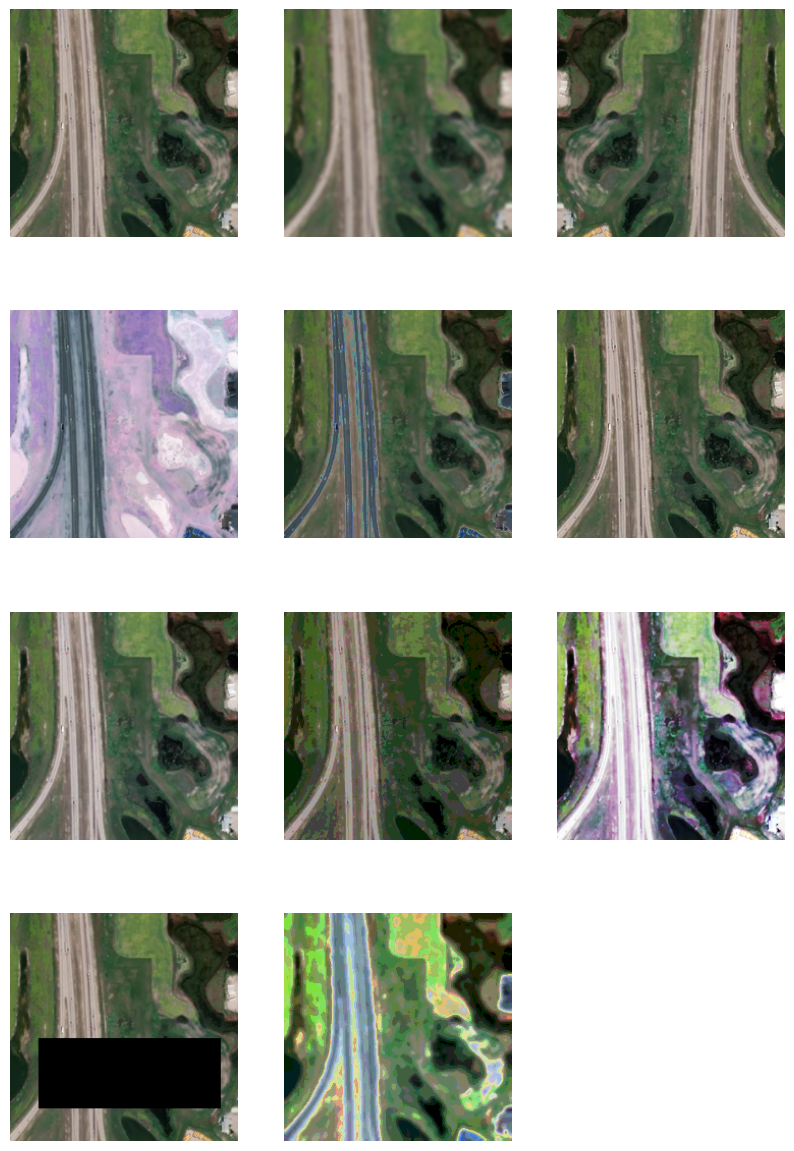

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 15))
col, row = 4, 3

for i in range(11):
    plt.subplot(col, row, i+1)
    a = train_dataset.__getitem__(i)[0]
    b = a.numpy()
    b = np.moveaxis(b, 0, 2)
    plt.imshow(b)
    plt.axis("off")

plt.show()


Compose(
    RandomSolarize(threshold=150.0,p=0.5)
)


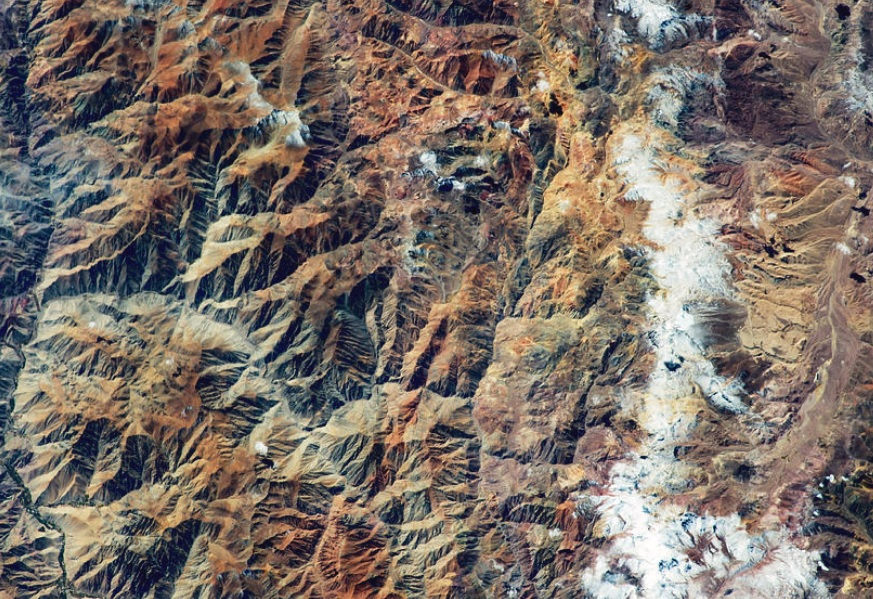

In [12]:
from torchvision import transforms
from PIL import Image
import torch
path = r"C:\Users\HS\OneDrive\바탕 화면\test.jpg"
img = Image.open(path)

transform = [transforms.GaussianBlur(kernel_size=(5,5), sigma=(0.1,5.)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomInvert(),
            transforms.RandomSolarize(threshold=150.0),
            transforms.RandomAdjustSharpness(2),
            transforms.RandomAutocontrast(),
            transforms.RandomPosterize(3),
            transforms.RandomEqualize(),
            transforms.ToTensor(), # index 8
            transforms.RandomErasing()]

t = transforms.Compose([transform[3]])
print(t)
t(img)